# SVM

In [3]:
# fill this up with imports for pandas, numpy, matplotlib, seaborn, etc.
# naive bayes, logistic regression, decision tree, random forest, svm, knn, xgboost, lightgbm, catboost
import pandas as pd
import numpy as np
from numpy import array
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pickle
from sklearn import svm, datasets
from sklearn.svm import SVC

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [4]:
# get data
data = pd.read_csv("/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589260 entries, 0 to 589259
Columns: 208 entries, triage_vital_temp to esi
dtypes: float64(208)
memory usage: 935.1 MB


In [5]:
data.keys()
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age']
data[new_keys].keys()

Index(['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr',
       'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age'],
      dtype='object')

In [6]:
# Split the data into features (X) and target (y)
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age']
X = data[new_keys]
y = data['esi']

print(y.head())

# Split the data into training and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

print(type(X_tr))

# X_train = torch.tensor(X_tr.values, dtype=torch.float64)
# y_train = torch.tensor(y_tr.values.reshape(-1,1), dtype=torch.long)
# X_test = torch.tensor(X_te.values, dtype=torch.float64)
# y_test = torch.tensor(y_te.values.reshape(-1,1), dtype=torch.long)

X_train = torch.tensor(X_tr.values, dtype=torch.float64)
y_train = torch.tensor(y_tr.values, dtype=torch.long)
X_test = torch.tensor(X_te.values, dtype=torch.float64)
y_test = torch.tensor(y_te.values, dtype=torch.long)

print(y_test.shape)
print(X_test.shape)

0    4.0
1    2.0
2    3.0
3    3.0
4    4.0
Name: esi, dtype: float64
<class 'pandas.core.frame.DataFrame'>
torch.Size([117852])
torch.Size([117852, 7])


In [7]:
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [8]:
# define model
ovo = SVC(decision_function_shape='ovo')
# fit model
ovo.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [9]:
# train models
# took 1629 minutes and longer, so interrupted the training
# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# poly = svm.SVC(kernel='poly', degree=6, C=1).fit(X_train, y_train)
# # get predictions
# poly_pred = poly.predict(X_test)
# rbf_pred = rbf.predict(X_test)

In [10]:
# make predictions
y_pred_ovr = ovr.predict(X_test)
y_pred_ovo = ovo.predict(X_test)
print(y_pred_ovo)
print(y_pred_ovr)


[5 2 4 ... 5 5 4]
[5 1 5 ... 5 5 4]


In [11]:
print(y_test.shape)
print(y_pred_ovr.shape)
print(y_pred_ovo.shape)
print(y_test)
print(y_pred_ovr)
print(y_pred_ovo)

torch.Size([117852])
(117852,)
(117852,)
tensor([5, 2, 5,  ..., 2, 1, 4])
[5 1 5 ... 5 5 4]
[5 2 4 ... 5 5 4]


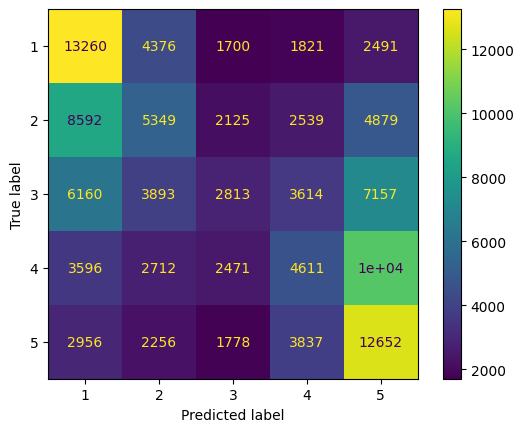

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovr)
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/SVMovr_confusion_yale_smote.png', dpi=300)

In [13]:
# cm = confusion_matrix(y_test, y_pred_ovr)

# FP = cm.sum(axis=0) - np.diag(cm)  
# FN = cm.sum(axis=1) - np.diag(cm)
# TP = np.diag(cm)
# TN = cm.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print(TPR, TNR, PPV, NPV, FPR, FDR, ACC)

In [22]:
TP = np.zeros(5)
FP = np.zeros(5)
FN = np.zeros(5)

for i in range(5):
    for j in range(len(y_test)):
        
        if int(y_test[j]) == i+1 and int(y_pred_ovr[j]) == i+1:
            TP[i] += 1
        elif int(y_test[j]) == i+1 and int(y_pred_ovr[j]) != i+1:
            FN[i] += 1
        elif int(y_test[j]) != i+1 and int(y_pred_ovr[j]) == i+1:
            FP[i] += 1
print(TP, FN, FP)

# Precision or positive predictive value
PPV = np.zeros(5)
for i in range(5):
    if TP[i]+FP[i] != 0:
        PPV[i] = TP[i]/(TP[i]+FP[i])

# Sensitivity, hit rate, recall, or true positive rate
TPR = np.zeros(5)
for i in range(len(TP)):
    if TP[i]+FN[i] != 0:
        TPR[i] = TP[i]/(TP[i]+FN[i])

# Overall accuracy
ACC = np.zeros(5)
class_totals = np.zeros(5)
for i in range(5):
    for j in range(len(y_test)):
        class_totals[int(y_test[j])-1] += 1
        if y_test[j] == y_pred_ovr[j]:
            ACC[int(y_test[j])-1] += 1
ACC /= class_totals

# F1
F1 = 2 * (PPV * TPR) / (PPV + TPR)

print(PPV, TPR, F1, ACC)

[13260.  5349.  2813.  4611. 12652.] [10388. 18135. 20824. 18993. 10827.] [21304. 13237.  8074. 11811. 24741.]
[0.38363615 0.28779727 0.25838156 0.28078188 0.3383521 ] [0.56072395 0.2277721  0.11900833 0.19534825 0.53886452] [0.45557617 0.25429047 0.1629591  0.23040024 0.41569194] [0.56072395 0.2277721  0.11900833 0.19534825 0.53886452]


In [16]:
accuray = accuracy_score(y_pred_ovr, y_test)
precision = precision_score(y_test, y_pred_ovr, average='weighted')
recall = recall_score(y_test, y_pred_ovr, average='weighted')

print("Accuracy:", accuray)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.32825068730271867
Precision: 0.3097950646488472
Recall: 0.32825068730271867


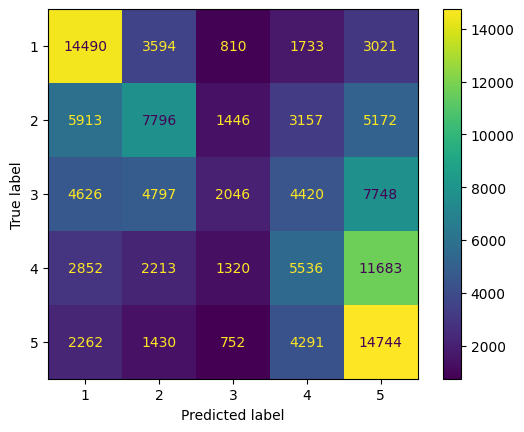

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ovo)
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/SVMovo_confusion_yale_smote.png', dpi=300)

In [20]:
TP = np.zeros(5)
FP = np.zeros(5)
FN = np.zeros(5)

for i in range(5):
    for j in range(len(y_test)):
        
        if int(y_test[j]) == i+1 and int(y_pred_ovo[j]) == i+1:
            TP[i] += 1
        elif int(y_test[j]) == i+1 and int(y_pred_ovo[j]) != i+1:
            FN[i] += 1
        elif int(y_test[j]) != i+1 and int(y_pred_ovo[j]) == i+1:
            FP[i] += 1
print(TP, FN, FP)

# Precision or positive predictive value
PPV = np.zeros(5)
for i in range(5):
    if TP[i]+FP[i] != 0:
        PPV[i] = TP[i]/(TP[i]+FP[i])

# Sensitivity, hit rate, recall, or true positive rate
TPR = np.zeros(5)
for i in range(len(TP)):
    if TP[i]+FN[i] != 0:
        TPR[i] = TP[i]/(TP[i]+FN[i])

# F1
F1 = 2 * (PPV * TPR) / (PPV + TPR)

# Overall accuracy
ACC = np.zeros(5)
class_totals = np.zeros(5)
for i in range(5):
    for j in range(len(y_test)):
        class_totals[int(y_test[j])-1] += 1
        if y_test[j] == y_pred_ovo[j]:
            ACC[int(y_test[j])-1] += 1
ACC /= class_totals

print(PPV, TPR, F1, ACC)

[14490.  7796.  2046.  5536. 14744.] [ 9158. 15688. 21591. 18068.  8735.] [15653. 12034.  4328. 13601. 27624.]
[0.48070862 0.3931417  0.32099153 0.28928254 0.34799849] [0.61273681 0.3319707  0.08655921 0.23453652 0.62796542] [0.53875184 0.35997599 0.13635    0.25904869 0.44782602] [0.61273681 0.3319707  0.08655921 0.23453652 0.62796542]


In [21]:
accuray = accuracy_score(y_pred_ovo, y_test)
precision = precision_score(y_test, y_pred_ovo, average='weighted')
recall = recall_score(y_test, y_pred_ovo, average='weighted')

print("Accuracy:", accuray)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.37854257882768216
Precision: 0.36644686287013
Recall: 0.37854257882768216
